Il faut forcer un des agents à fixer un prix bas pour voir comment il réagit

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

#.py
from core import qlearning as q

In [4]:
total_rewards = []
final_q_matrices = []

for loop in range(3):
    print("Loop:", loop)
    agents = [q.Agent() for _ in range(2)]
    env = q.Env()
    
    temps = []
    rewards = []
    epsilon = []
    prices = []

    # Initialisation des prix p0 (on va le faire directement dans chaque agent)
    for agent in agents:
        agent.p = np.random.choice(agent.A)

    # Initialisation de l'état
    s_t = env([agent.p for agent in agents])[1]
    for agent in agents:
        agent.s_t = s_t
    s_ind = agents[0].find_index(agents[0].s_t)
    for agent in agents:
        agent.s_ind = s_ind

    # Phase itérative
    for t in range(10**6):
        # Actions et état t+1
        for agent in agents:
            agent.a_ind = agent.get_next_action()

        s_t1 = env([agent.A[agent.a_ind] for agent in agents])[1]
        for agent in agents:
            agent.s_t1 = s_t1
            
        s_ind1 = agents[0].find_index(agents[0].s_t1)
        for agent in agents:
            agent.s_ind1 = s_ind1

        temps.append(t)
        ret = env(s_t1)
        quant, price, cost = ret

        re = ret[0]*ret[1]-ret[0]*ret[2]
        rewards.append(re)
        epsilon_values = [agent.epsilon for agent in agents]
        epsilon.append(epsilon_values)
        prices.append([agent.p for agent in agents])

        for i, agent in enumerate(agents):
            agent.updateQ(q=quant[i], p=price[i], c=cost[i], t=t)
        
    total_rewards.append(rewards)
    

    aggregated_agents = np.array(total_rewards).mean(axis=0)
    
    for agent in agents:
        final_q_matrices.append(agent.Q.copy())

Loop: 0


AttributeError: 'Agent' object has no attribute 'S'

In [33]:
# Phase de jeu avec les agents entraînés
  # Nombre d'étapes de simulation de jeu
game_rewards = []


rewards = []  # Stocker les récompenses pour chaque étape de la simulation de jeu
prices = []
    
# Initialisation de l'état de départ pour chaque agent
s_t = env([agent.p for agent in agents])[1]
for agent in agents:
    agent.s_t = s_t

s_ind = agents[0].find_index(agents[0].S, agents[0].s_t)
for agent in agents:
    agent.s_ind = s_ind
    
# Simulation de jeu
for t in range(500):  # Changer le nombre d'étapes si nécessaire
    # Actions des agents (politique déterministe)
    for agent in agents:
        agent.a_ind = agent.Q[:, agent.s_ind].argmax() # ca change, on n'utilise plus epsilon-greedy 
        
    # État suivant et récompense
    s_t1 = env([agent.A[agent.a_ind] for agent in agents])[1]
    ret = env(s_t1)
    quant, price, cost = ret

    re = ret[0]*ret[1]-ret[0]*ret[2]
    rewards.append(re)
    prices.append(price)
        
    # Mettre à jour l'état pour la prochaine étape
    s_t = s_t1
    for agent in agents:
        agent.s_t = s_t
    s_ind1 = agents[0].find_index(agents[0].S, s_t1)
    for agent in agents:
        agent.s_ind1 = s_ind1
    
    for i, agent in enumerate(agents):
            agent.updateQ(q=quant[i], p=price[i], c=cost[i], t=t)
    

print(f"Rewards : {rewards}")
print(f"Prices : {prices}")

Rewards : [array([0.27166108, 0.29871647]), array([0.25005652, 0.33584966]), array([0.33011509, 0.15857185]), array([0.34355771, 0.27960543]), array([0.2368855 , 0.35316849]), array([0.20864308, 0.33462698]), array([0.35316849, 0.2368855 ]), array([0.26178844, 0.31764339]), array([0.33167768, 0.11990343]), array([0.24935065, 0.38030686]), array([0.31764339, 0.26178844]), array([0.27166108, 0.29871647]), array([0.25005652, 0.33584966]), array([0.33011509, 0.15857185]), array([0.34355771, 0.27960543]), array([0.2368855 , 0.35316849]), array([0.20864308, 0.33462698]), array([0.35316849, 0.2368855 ]), array([0.26178844, 0.31764339]), array([0.33167768, 0.11990343]), array([0.24935065, 0.38030686]), array([0.31764339, 0.26178844]), array([0.27166108, 0.29871647]), array([0.25005652, 0.33584966]), array([0.33011509, 0.15857185]), array([0.34355771, 0.27960543]), array([0.2368855 , 0.35316849]), array([0.20864308, 0.33462698]), array([0.35316849, 0.2368855 ]), array([0.26178844, 0.31764339]),

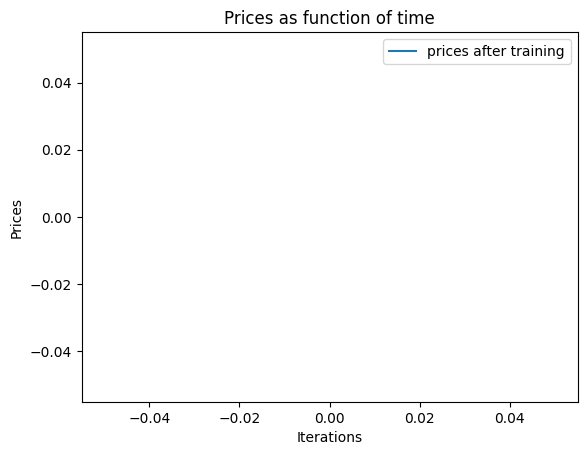

In [3]:
import matplotlib.pyplot as plt
plt.plot(range(len(prices))[-10:], prices[-10:], label=f"prices after training")

plt.xlabel("Iterations")
plt.ylabel("Prices")
plt.title("Prices as function of time")
plt.legend()
plt.show()